<font color=green size=7>Exploração dos Dados do Enem 2021</font>

### Exame nacional do Ensino Médio

O <b>Exame Nacional do Ensino Médio (Enem)</b> foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Desde 2020, o participante pode escolher entre fazer o exame impresso ou o Enem Digital, com provas aplicadas em computadores, em locais de prova definidos pelo Inep.  
                                                                               <b>Fonte:</b> Site do Inep 
    


### Fonte dos Dados

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

### Dicionário do Dataset

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|M|Masculino|
|F|Feminino|

> ### Faixa Etária
> ***

|Código|Descrição|
|---|---|
|1|Menor de 17 anos|
|2|17 anos|
|3|18 anos|
|4|19 anos|
|5|20 anos|
|6|21 anos|
|7|22 anos|
|8|23 anos|
|9|24 anos|
|10|25 anos|
|11|Entre 26 e 30 anos|
|12|Entre 31 e 35 anos|
|13|Entre 36 e 40 anos|
|14|Entre 41 e 45 anos|
|15|Entre 46 e 50 anos|
|16|Entre 51 e 55 anos|
|17|Entre 56 e 60 anos| 
|18|Entre Entre 61 e 65 anos|
|19|Entre 66 e 70 anos|
|20|Maior de 70 anos|

> ### Cor/Raça
> ***

|Código|Descrição|
|---|---|
|0|Não Declarado|
|1|Branca|
|2|Preta|
|3|Parda|
|4|Amarela|
|5|Indígena|
|6|NA|

> ### Nacionalidade
> ***

|Código|Descrição|
|---|---|
|0|Não informado|
|1|Brasileiro(a)|
|2|Brasileiro(a) Naturalizado(a)|
|3|Estrangeiro(a)|
|4|Brasileiro(a) Nato(a), nascido(a) no exterior|

> ### Questionário Q001 e Q002
> ***

|Código|Descrição|
|---|---|
|A|Nunca estudou|
|B|Não completou a 4ª série/5º ano do Ensino Fundamental|
|C|Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental|
|D|Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio|
|E|Completou o Ensino Médio, mas não completou a Faculdade|
|F|Completou a Faculdade, mas não completou a Pós-graduação|
|G|Completou a Pós-graduação|
|H|Não sei|


In [59]:
# Importar a biblioteca pandas e numpy para manipular os dados armazenados no dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import normaltest

In [2]:
np.__version__

'1.23.0'

In [3]:
# utilizar o método pd.read_csv para ler o arquivo csv
dados_enem = pd.read_csv("MICRODADOS_ENEM_2021.csv", encoding="ISO -8859-1", sep = ';')

In [4]:
# imprimir as 5 primeiras linhas do dataset
dados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [5]:
# utilizar o metodo shape para conhecer o numero de linhas e colunas do dataset
print('O dataframe possui {} linhas e {} colunas'.format(dados_enem.shape[0],dados_enem.shape[1]))


O dataframe possui 3389832 linhas e 76 colunas


In [6]:
# visualiar todas as colunas presente no dataset irá imprimir uma array
dados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [186]:
# vamos selecionar algumas colunas

colunas_selecionadas = ['NU_INSCRICAO','NU_ANO','TP_SEXO','TP_FAIXA_ETARIA','TP_SIT_FUNC_ESC',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE','NO_MUNICIPIO_PROVA',
       'SG_UF_ESC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','TP_DEPENDENCIA_ADM_ESC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','Q001', 'Q002','Q024', 'Q025']

In [187]:
# criar um dataset com as colunas selecionadas
dados_selecionado = dados_enem.filter(items=colunas_selecionadas)
dados_selecionado.head()

,NU_INSCRICAO,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_SIT_FUNC_ESC,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_PROVA,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025
0,210053865474,2021,F,5,NaN,1,1,1,Nova Lima,NaN,NaN,574.6,472.6,NaN,NaN,760.0,F,F,B,B
1,210052384164,2021,M,12,NaN,1,1,1,Maceió,NaN,505.9,551.8,498.3,NaN,461.5,560.0,B,B,A,A
2,210052589243,2021,F,13,NaN,3,1,1,Ferraz de Vasconcelos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,B
3,210052128335,2021,M,3,1.0,1,3,1,Crato,CE,580.7,678.9,638.9,2.0,659.5,780.0,B,B,B,B
4,210051353021,2021,F,2,1.0,1,3,1,Acarape,CE,497.7,532.4,457.6,2.0,582.6,780.0,D,E,B,B


In [9]:
pd.DataFrame({'tipos':dados_selecionado.dtypes, 'missing':dados_selecionado.isna().sum()})

,tipos,missing
NU_INSCRICAO,int64,0
NU_ANO,int64,0
TP_SEXO,object,0
TP_FAIXA_ETARIA,int64,0
TP_ESTADO_CIVIL,int64,0
TP_COR_RACA,int64,0
TP_NACIONALIDADE,int64,0
NO_MUNICIPIO_PROVA,object,0
SG_UF_ESC,object,2576026
NU_NOTA_CN,float64,1143988


<b>Método info():</b> Este método imprime informações sobre um DataFrame, incluindo o índice dtype e colunas, valores não nulos e uso de memória.


In [10]:
dados_selecionado.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NU_INSCRICAO        3389832 non-null  int64  
 1   NU_ANO              3389832 non-null  int64  
 2   TP_SEXO             3389832 non-null  object 
 3   TP_FAIXA_ETARIA     3389832 non-null  int64  
 4   TP_ESTADO_CIVIL     3389832 non-null  int64  
 5   TP_COR_RACA         3389832 non-null  int64  
 6   TP_NACIONALIDADE    3389832 non-null  int64  
 7   NO_MUNICIPIO_PROVA  3389832 non-null  object 
 8   SG_UF_ESC           813806 non-null   object 
 9   NU_NOTA_CN          2245844 non-null  float64
 10  NU_NOTA_CH          2378379 non-null  float64
 11  NU_NOTA_LC          2378379 non-null  float64
 12  NU_NOTA_MT          2245844 non-null  float64
 13  NU_NOTA_REDACAO     2378379 non-null  float64
 14  Q001                3389830 non-null  object 
 15  Q002           

## Iremos fazer algumas perguntas para o Dataset

### 1) Qual a distribuição de sexo declarado no Enem?

In [11]:
dist_sexo = dados_selecionado['TP_SEXO']
freq_sexo = dist_sexo.value_counts()
freq_sexo

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [12]:
# iremos utilizar o paramentro normalize para tirar o percentual
percentual=dist_sexo.value_counts(normalize = True)*100
percentual.round()

F    62.0
M    38.0
Name: TP_SEXO, dtype: float64

In [13]:
# construir uma tabela com a frequencia e porcentagem do sexo declarado 
dist_freq_qualitativas = pd.DataFrame({'Frequência': freq_sexo, 'Porcentagem (%)': percentual.round()})
dist_freq_qualitativas.rename(index = {"M": 'Masculino', "F": 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace =True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Feminino,2090526,62.0
Masculino,1299306,38.0




Segundo um levamanento feito pelo Instituto Semesp, 57% dos estudantes matriculados nas instituições de ensino superiores são do sexo feminino.(https://agenciabrasil.ebc.com.br/educacao/noticia/2020-05/mapa-do-ensino-superior-aponta-para-maioria-feminina-e-branca) 

<b>Conclusão: </b> Com o resultado dos dados encontrado no dataset o qual mostra que 62% dos candidatos são do sexo feminino e 38% do sexo masculino o resultado mostrado pelo conjunto de dados só corrobora com pesquisa feita pelo Instituto Semesp.

### 2) Qual relação de distribuição da  faixa etária dos candidatos por sexo?

In [14]:
# utilizar o metodo groupby para agrupar a variável
faixa_etaria_sexo = ['TP_FAIXA_ETARIA','TP_SEXO']
faixaetaria_sexo = dados_enem.filter(items = faixa_etaria_sexo)

In [15]:
Contagem_sexo_F = faixaetaria_sexo.query('TP_SEXO == "F"').value_counts().to_frame().reset_index()
Contagem_sexo_F.columns = ['Faixa_Etária', 'Sexo', 'Total']
Contagem_sexo_F.head()


,Faixa_Etária,Sexo,Total
0,3,F,431685
1,2,F,388078
2,4,F,244843
3,1,F,184125
4,5,F,154204


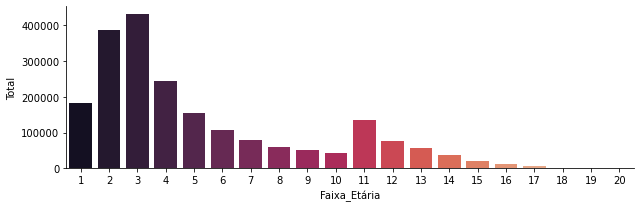

In [16]:
sns.catplot(x = 'Faixa_Etária', y = 'Total', kind = 'bar', data= Contagem_sexo_F,
           aspect = 3, height = 3,palette = 'rocket')


In [17]:
Contagem_sexo_M = faixaetaria_sexo.query('TP_SEXO == "M"').value_counts().to_frame().reset_index()
Contagem_sexo_M.columns = ['Faixa_Etária', 'Sexo', 'Total']
Contagem_sexo_M.head()

,Faixa_Etária,Sexo,Total
0,3,M,267680
1,2,M,232706
2,4,M,149846
3,5,M,96486
4,11,M,93411


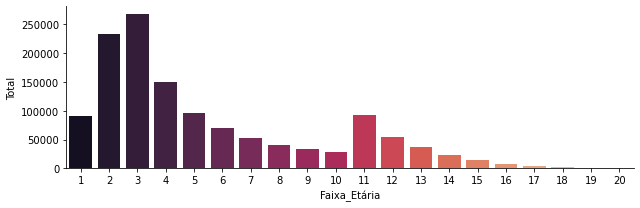

In [18]:
sns.catplot(x = 'Faixa_Etária', y = 'Total', kind = 'bar', data= Contagem_sexo_M,
           aspect = 3, height = 3,palette = 'rocket')

In [19]:
Contagem_sexo = (faixaetaria_sexo.value_counts(normalize = True)*100).to_frame().reset_index().round(2)
Contagem_sexo.columns = ['FAIXA_ETARIA','SEXO','Percentual(%)']

In [20]:
dict_faixa_etaria = {1:'Menor de 17 anos', 2:'17 anos', 3:'18 anos', 4:'19 anos',5:'20 anos',
6:'21 anos', 7:'22 anos', 8:'23 anos', 9:'24 anos', 10:'25 anos', 11:'Entre 26 e 30 anos',
12:'Entre 31 e 35 anos', 13:'Entre 36 e 40 anos', 14:'Entre 41 e 45 anos', 15:'Entre 46 e 50 anos',
16:'Entre 51 e 55 anos', 17:'Entre 56 e 60 anos', 18:'Entre 61 e 65 anos',19:'Entre 66 e 70 anos',
20:'Maior de 70 anos'}

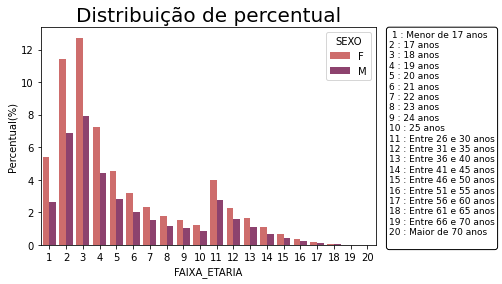

In [21]:
ax = sns.barplot(data=Contagem_sexo, x='FAIXA_ETARIA', y='Percentual(%)', hue='SEXO',palette = 'flare')
ax.set_title("Distribuição de percentual", fontsize = 20)


textdict = " "
for key,value in dict_faixa_etaria.items():
    textdict = textdict + "{k} : {v}\n".format(k=key,v=value)

ax.text(1.04, -0.00, textdict, transform=ax.transAxes, fontsize = 9, color = 'black',
       bbox = {'boxstyle': 'round', 'facecolor': 'white', 'alpha': 1})
ax=ax

### Podemos inferir do gráfico:
1) A faixa etária com maior número de participação é a de 18 anos e também maior participação feminina.

2) Em quase todas as faixas etárias o que prevalece é o sexo feminino, no gráfico não mostra, mas nas duas últimas faixas o sexo masculino prevalece.

3) As faixas etárias 2, 3,e 4 têm um número muito grande pela seguinte questão: muitos dos candidatos estão prestando seu primeiro vestibular pois estão já no último ano do Ensino Médio.

4) Podem ter candidatos das faixas etárias maiores também que prestaram seu primeiro vestibular, que são aquelas pessoas que concluiram o seu ensino médio de forma tardio.

## 3) Qual a distribuição por frequência absoluta da Cor/Raça no enem 2021 em relação ao sexo?

In [22]:
raca_sexo = ['NU_INSCRICAO','TP_COR_RACA','TP_SEXO']
dist_raca_sexo = dados_enem.filter(items = raca_sexo)
distribuicao_frequência_cor_raca = dist_raca_sexo.groupby(['TP_COR_RACA','TP_SEXO']).count()
distribuicao_frequência_cor_raca.columns = ['Total']
distribuicao_frequência_cor_raca

Total
TP_COR_RACA TP_SEXO        
0           F         42564
            M         28585
1           F        834484
            M        527772
2           F        250936
            M        160366
3           F        904499
            M        552955
4           F         46961
            M         21530
5           F         11080
            M          8095
6           F             2
            M             3

In [23]:
# plotar um grafico 
grafico = distribuicao_frequência_cor_raca.reset_index()
grafico['TP_COR_RACA'] = grafico['TP_COR_RACA'].map({0: "NA",1: "Branca",2: "Preta",3: "Parda",4: "Amarela",5: "Indígena",6: "NA"})
grafico

,TP_COR_RACA,TP_SEXO,Total
0,NA,F,42564
1,NA,M,28585
2,Branca,F,834484
3,Branca,M,527772
4,Preta,F,250936
5,Preta,M,160366
6,Parda,F,904499
7,Parda,M,552955
8,Amarela,F,46961
9,Amarela,M,21530


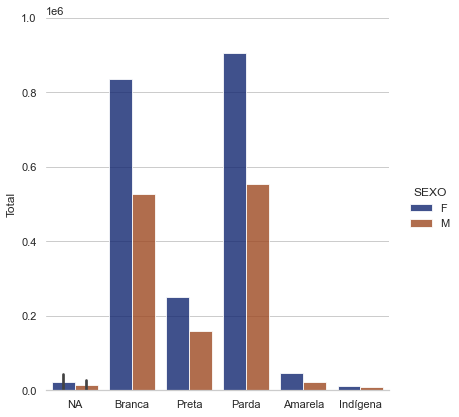

In [24]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=grafico, kind="bar",
    x="TP_COR_RACA", y="Total", hue="TP_SEXO",
   palette="dark", alpha=.8, height=6)
g.despine(left=True)
g.set_axis_labels("", "Total")
g.legend.set_title("SEXO")
g.set(ylim=(0, 1000000))
ax=ax

De acordo com grafico de distribuiçao podemos observar que Candidatos que se autodeclararam pardos são maioria entre outras Cores/Raças. 

Candidatos que se autodeclararam Brancos vem logo após como segunda Cor/Raça mais presente no Enem 2021. 

E logo despois os candidatos autodeclarados pretos com menos de 500.000 candidatos. 


Essa distribuição é bem semelhanete a que IBGE através da PNAD, Pesquisa Nacional por Amostra de Domicílios (PNAD Contínua) 2021, divulgou, que 43,0% dos brasileiros se declararam como brancos, 47,0% como pardos e 9,1% como pretos. 




## 4) Quantos candidatos estrangeiros prestaram o Enem?

> ### 4.1) por frequência relativa

In [25]:
nacionalidade_frequencia_relativa = (dados_enem['TP_NACIONALIDADE'].value_counts(normalize = True)*100).to_frame().reset_index().round(2)
nacionalidade_frequencia_relativa.columns = ['Nacionalidade', 'Percentual(%)']
nacionalidade_frequencia_relativa['Nacionalidade'] = nacionalidade_frequencia_relativa['Nacionalidade'].map({1: "Brasileiro(a)", 2: "Brasileiro(a) Naturalizado(a)",
                                                                                                             4: "Brasileiro(a) Nato(a), nascido(a) no exterior", 
                                                                                                             3: "Estrangeiro(a)", 0: "Não informado"})
nacionalidade_frequencia_relativa

,Nacionalidade,Percentual(%)
0,Brasileiro(a),97.67
1,Brasileiro(a) Naturalizado(a),1.93
2,"Brasileiro(a) Nato(a), nascido(a) no exterior",0.19
3,Estrangeiro(a),0.13
4,Não informado,0.07


> ### 4.2) por frequência absoluta

In [26]:
nacionalidade_frequencia_absoluta = dados_enem['TP_NACIONALIDADE'].value_counts().to_frame().reset_index()
nacionalidade_frequencia_absoluta.columns  = ["Nacionalidade", "Total"]
nacionalidade_frequencia_absoluta["Nacionalidade"] = nacionalidade_frequencia_absoluta["Nacionalidade"].map({0: "Não informado", 1: "Brasileiro(a)", 2: "Brasileiro(a) Naturalizado(a)",
                                                                                                             3: "Estrangeiro(a)", 4: "Brasileiro(a) Nato(a), nascido(a) no exterior"})
nacionalidade_frequencia_absoluta

,Nacionalidade,Total
0,Brasileiro(a),3310876
1,Brasileiro(a) Naturalizado(a),65525
2,"Brasileiro(a) Nato(a), nascido(a) no exterior",6526
3,Estrangeiro(a),4562
4,Não informado,2343


In [27]:
dados_enem[['TP_NACIONALIDADE','TP_FAIXA_ETARIA']].query("TP_NACIONALIDADE == 0").groupby('TP_FAIXA_ETARIA').count()

,TP_NACIONALIDADE
TP_FAIXA_ETARIA,
1,117
2,537
3,721
4,312
5,195
6,97
7,50
8,30
9,27


<AxesSubplot:ylabel='TP_FAIXA_ETARIA'>

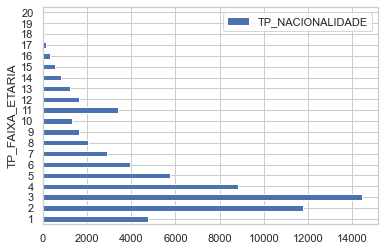

In [28]:
dados_enem[['TP_NACIONALIDADE','TP_FAIXA_ETARIA']].query("TP_NACIONALIDADE == 2").groupby('TP_FAIXA_ETARIA').count().plot(kind = "barh")

97% dos candidatos são brasileiros. Quase 2% dos candidatos são naturalizados. Os brasileiros naturalizados também poderiam sinalizar no questionário que são brasileiros pois a opção brasileiro(a) não faz diferença entre natos e naturalizados. 0.19% declararam ser Brasileiro Nato, porém nascido no exterior e 0.13% se declarou estrangeiro.

Explorando as idades dos candidatos Brasileiro Naturalizados podemos observar que eles estão presentes em todas as faixa etaria e maior número estão nas idades  de 18 e 19 anos. 

## 5) Qual a média das notas em matemática, Português,e Redação de acordo com escolaridade do Pai e da Mãe?


In [29]:
#definindo um dicionario para visualizar melhor o resultado

dicionarioq01q02 = {'A': 'Nunca estudou',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H':'Não sei'}
dicionarioq24 = {"A": "Não", "B": "Sim,um","C":"Sim, dois","D":"Sim, três","E":"Sim, quatro ou mais"}
dicionarioq25 = {"A":"Não","B":"Sim"}

In [30]:
colunasselecionadas = ['NU_INSCRICAO','NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_REDACAO','Q001', 'Q002','Q024', 'Q025']
microdadosenemselecionado = dados_selecionado.filter(items = colunasselecionadas)
microdadosenemselecionado = microdadosenemselecionado.dropna()
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025
1,210052384164,461.5,498.3,560.0,B,B,A,A
3,210052128335,659.5,638.9,780.0,B,B,B,B
4,210051353021,582.6,457.6,780.0,D,E,B,B
8,210053417016,493.4,450.7,520.0,B,B,A,B
9,210051128744,413.3,494.6,380.0,D,D,A,B


In [31]:
microdadosenemselecionado['NO_Q001'] = [dicionarioq01q02[resp] for resp in microdadosenemselecionado.Q001]
microdadosenemselecionado['NO_Q002'] = [dicionarioq01q02[resp] for resp in microdadosenemselecionado.Q002]
microdadosenemselecionado['NO_Q024'] = [dicionarioq24[resp] for resp in microdadosenemselecionado.Q024]
microdadosenemselecionado['NO_Q025'] = [dicionarioq25[resp] for resp in microdadosenemselecionado.Q025] 

In [32]:
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025,NO_Q001,NO_Q002,NO_Q024,NO_Q025
1,210052384164,461.5,498.3,560.0,B,B,A,A,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,Não,Não
3,210052128335,659.5,638.9,780.0,B,B,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,"Sim,um",Sim
4,210051353021,582.6,457.6,780.0,D,E,B,B,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...","Sim,um",Sim
8,210053417016,493.4,450.7,520.0,B,B,A,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,Não,Sim
9,210051128744,413.3,494.6,380.0,D,D,A,B,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,Não,Sim


## 6) Qual a média das notas em Matemática, Português, e Redação de acordo com escolaridade do Pai e da Mãe?

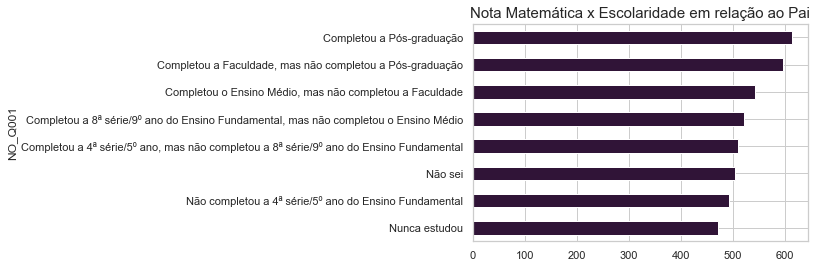

In [33]:
# Desempenho em Matemática em relação à escolidade do PAI
grafico_nota_matematica_p = microdadosenemselecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending= True)
ax = grafico_nota_matematica_p.plot(kind = 'barh', colormap = 'twilight_shifted',legend = False)
ax.set_title("Nota Matemática x Escolaridade em relação ao Pai", fontsize = 15)
ax=ax

Text(0.5, 1.0, 'Nota Matemática x Escolaridade da Mãe')

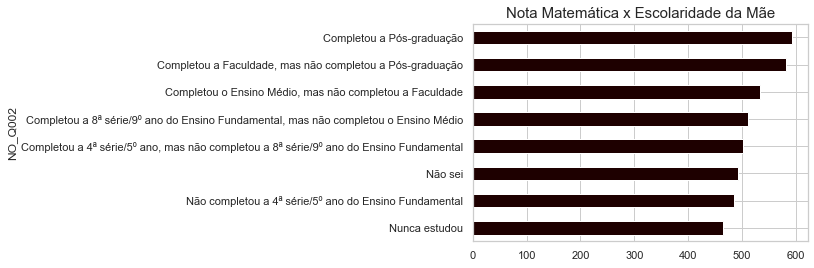

In [34]:
# Desempenho em Matemática em relação à escolidade do Mãe

grafico_nota_matematica_m = microdadosenemselecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending= True)
ax = grafico_nota_matematica_m.plot(kind = "barh", colormap = "pink", legend = False)
ax.set_title("Nota Matemática x Escolaridade da Mãe", fontsize = 15)

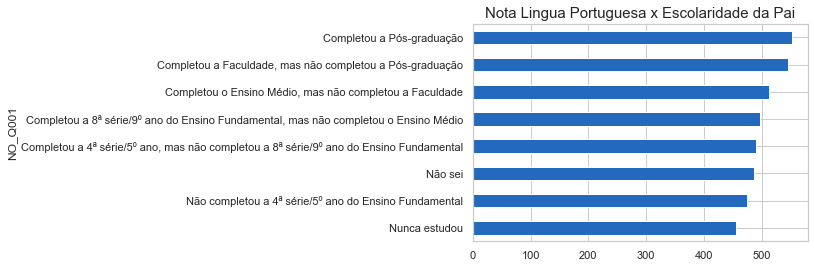

In [35]:
# Desempenho em Português em relação à escolidade do PAI
grafico_nota_portugues_p = microdadosenemselecionado.filter(items=['NU_NOTA_LC', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_LC', ascending= True)
ax = grafico_nota_portugues_p.plot(kind = "barh", colormap = "vlag", legend = False)
ax.set_title("Nota Lingua Portuguesa x Escolaridade da Pai", fontsize = 15)
ax=ax

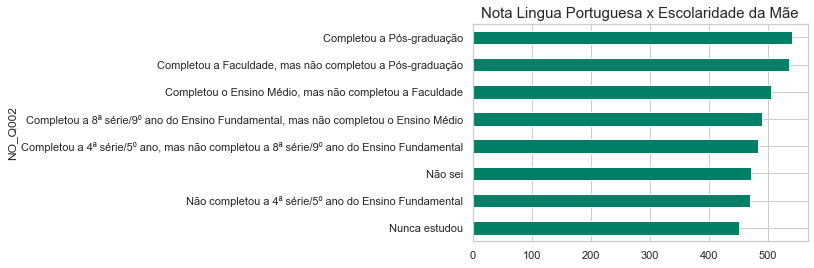

In [36]:
# Desempenho em Português em relação à escolidade do Mãe
grafico_nota_portugues_m = microdadosenemselecionado.filter(items=['NU_NOTA_LC', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_LC', ascending= True)
ax = grafico_nota_portugues_m.plot(kind = "barh", colormap = "summer", legend = False)
ax.set_title("Nota Lingua Portuguesa x Escolaridade da Mãe", fontsize = 15)
ax=ax

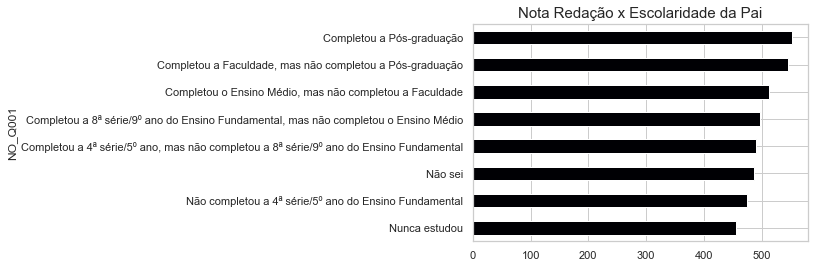

In [37]:
# Desempenho em Redação em relação à escolidade do Pai
grafico_nota_redacao_p = microdadosenemselecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending= True)
ax = grafico_nota_portugues_p.plot(kind = "barh", colormap = "magma", legend = False)
ax.set_title("Nota Redação x Escolaridade da Pai", fontsize = 15)
ax=ax

Text(0.5, 1.0, 'Nota Lingua Portuguesa x Escolaridade da Mãe')

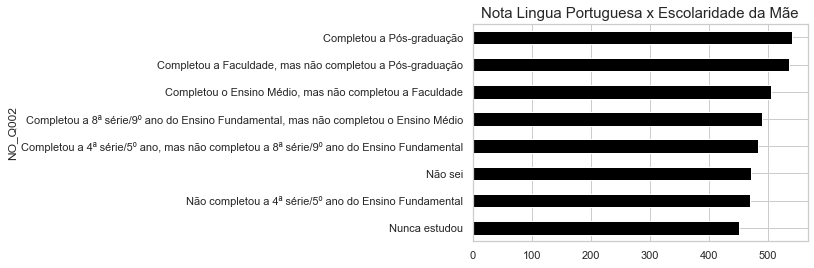

In [38]:
# Desempenho em Redação em relação à escolidade do Pai
grafico_nota_recacao_m = microdadosenemselecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending= True)
ax = grafico_nota_portugues_m.plot(kind = "barh", colormap = "copper", legend = False)
ax.set_title("Nota Lingua Portuguesa x Escolaridade da Mãe", fontsize = 15)

Analisando as médias das notas em Lingua Portguesa, Mátemática e Redação foi verificado que quanto maior a escolaridade dos pais 
melhor é o desempenho do candidato.

Em relação a nota de matemática, foi observado uma diferença entre as medias um pouco acentuada quando os pais já completou a Pós-Graduação e Completou a facultadade, mas não completou a Pós-Graduação. 

## 7) Qual relação da nota com o acesso a internet e ter um computador em casa?

In [39]:
microdadosenemselecionado[["NU_INSCRICAO","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO","NO_Q024","NO_Q025"]]



,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NO_Q024,NO_Q025
1,210052384164,461.5,498.3,560.0,Não,Não
3,210052128335,659.5,638.9,780.0,"Sim,um",Sim
4,210051353021,582.6,457.6,780.0,"Sim,um",Sim
8,210053417016,493.4,450.7,520.0,Não,Sim
9,210051128744,413.3,494.6,380.0,Não,Sim
...,...,...,...,...,...,...
3389793,210054306230,450.4,416.3,240.0,"Sim,um",Sim
3389807,210051254419,399.2,534.7,320.0,"Sim,um",Sim
3389814,210051121001,678.0,631.0,640.0,"Sim, dois",Sim
3389815,210051173067,370.0,466.3,540.0,Não,Sim


>> <b>7.1) Candidatos com/sem acesso a internet e a relação da media das notas de Matemática Portugues e Redação?</b>

In [40]:
acesso_internet = (microdadosenemselecionado["NO_Q025"].value_counts(normalize = True)*100).round().to_frame().reset_index()
acesso_internet.columns = ["acesso_internet", "%_Percentual"]
acesso_internet

,acesso_internet,%_Percentual
0,Sim,92.0
1,Não,8.0


In [41]:
# Desempenho em Matemática dos Candidatos que possuem internet e aqueles que não possuem
microdadosenemselecionado[["NO_Q025","NU_NOTA_MT"]].groupby("NO_Q025").mean()

,NU_NOTA_MT
NO_Q025,
Não,471.828225
Sim,541.054352


In [42]:
# Desempenho em Português dos Candidatos que possuem internet e aqueles que não possuem
microdadosenemselecionado[["NO_Q025","NU_NOTA_LC"]].groupby("NO_Q025").mean()

,NU_NOTA_LC
NO_Q025,
Não,455.383714
Sim,509.449841


In [43]:
# Desempenho em Redação dos Candidatos que possuem internet e aqueles que não possuem
microdadosenemselecionado[["NO_Q025","NU_NOTA_REDACAO"]].groupby("NO_Q025").mean()

,NU_NOTA_REDACAO
NO_Q025,
Não,538.094916
Sim,630.352163


>> <b>7.2) Quantos candidatos têm pelo menos um computador em casa?</b>

In [44]:
microdadosenemselecionado["NO_Q024"].value_counts().to_frame()

,NO_Q024
"Sim,um",954011
Não,833126
"Sim, dois",279242
"Sim, três",113143
"Sim, quatro ou mais",58584


In [45]:
qtd_pc_mat = microdadosenemselecionado[["NO_Q024","NU_NOTA_MT"]].groupby("NO_Q024").mean()
qtd_pc_mat["DESVIO_PADRAO"] = microdadosenemselecionado[["NO_Q024","NU_NOTA_MT"]].groupby("NO_Q024").std()
qtd_pc_mat

,NU_NOTA_MT,DESVIO_PADRAO
NO_Q024,,
Não,486.477898,83.942063
"Sim, dois",596.522175,115.238049
"Sim, quatro ou mais",649.008883,115.485327
"Sim, três",625.034669,116.245561
"Sim,um",542.149497,106.061252


In [46]:
microdadosenemselecionado[["NO_Q024","NU_NOTA_MT"]].groupby("NO_Q024").sem()

,NU_NOTA_MT
NO_Q024,
Não,0.091965
"Sim, dois",0.218075
"Sim, quatro ou mais",0.477131
"Sim, três",0.345591
"Sim,um",0.108588


In [48]:
qtd_pc_port = microdadosenemselecionado[["NO_Q024","NU_NOTA_LC"]].groupby("NO_Q024").mean()
qtd_pc_port["DESVIO_PADRAO"] = microdadosenemselecionado[["NO_Q024","NU_NOTA_LC"]].groupby("NO_Q024").std().round(2)
qtd_pc_port

,NU_NOTA_LC,DESVIO_PADRAO
NO_Q024,,
Não,469.938522,70.16
"Sim, dois",546.014742,71.89
"Sim, quatro ou mais",570.954701,68.64
"Sim, três",560.816545,70.52
"Sim,um",512.651196,73.19


In [50]:
qtd_pc_red = microdadosenemselecionado[["NO_Q024","NU_NOTA_REDACAO"]].groupby("NO_Q024").mean()
qtd_pc_red["DESVIO_PADRAO"] = microdadosenemselecionado[["NO_Q024","NU_NOTA_REDACAO"]].groupby("NO_Q024").std()
qtd_pc_red

,NU_NOTA_REDACAO,DESVIO_PADRAO
NO_Q024,,
Não,562.671433,181.536824
"Sim, dois",693.427493,170.026587
"Sim, quatro ou mais",734.472211,160.778594
"Sim, três",721.631033,164.193151
"Sim,um",635.462673,175.131836


In [52]:
desvio_padrao_port = microdadosenemselecionado[["NO_Q024","NU_NOTA_LC"]].groupby("NO_Q024").std().sort_values( by = "NU_NOTA_LC", ascending = False).reset_index()
desvio_padrao_port

,NO_Q024,NU_NOTA_LC
0,"Sim,um",73.194942
1,"Sim, dois",71.893307
2,"Sim, três",70.518153
3,Não,70.155290
4,"Sim, quatro ou mais",68.637288


## 8 ) Teste de comparação da média das notas entre sexo

In [86]:
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import norm

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das notas do sexo masculino
### $\mu_2 \Rightarrow$ Média das notas do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

 ### <font color='black'> As notas em Português do sexo masculino é maior que a do sexo feminino?</font>

In [87]:
# vamos colher as duas amostras e verificar se as notas em português tem diferença entre o sexo masculino e feminino
notas_lc_F  = dados_selecionado.query("TP_SEXO == 'F'").sample(n = 1000, random_state = 101).NU_NOTA_LC.dropna()
notas_lc_M  = dados_selecionado.query("TP_SEXO == 'M'").sample(n = 1000, random_state = 101).NU_NOTA_LC.dropna()

In [91]:
# Retirar a média do sexo feminino
media_amostra_f = notas_lc_F.mean()
media_amostra_f

501.1357142857142

In [92]:
# Retirar a média do sexo masculino
media_amostra_m = notas_lc_M.mean()
media_amostra_m

506.7061079545452

In [93]:
# retirar o desvio padrão das notas do sexo feminino
desvio_padrao_f = notas_lc_F.std()
desvio_padrao_f

82.5656472429017

In [94]:
# retirar o desvio padrão das notas do sexo masculino
desvio_padrao_m = notas_lc_M.std()
desvio_padrao_m

79.48171053597018

In [104]:
significancia = 0.05
confianca = 1 - significancia
n_M = 1000
n_H = 1000
D_0 = 0

In [105]:
probabilidade = confianca
probabilidade

0.95

In [109]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

In [110]:
numerador = (media_amostra_m - media_amostra_f) - D_0

denominador = np.sqrt((desvio_padrao_f ** 2 / n_H) + (desvio_padrao_m ** 2 / n_M))

z = numerador / denominador

z

1.5370227639587153

In [111]:
z >= z_alpha

False

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$ , isto é, concluímos que a média das notas em Português do sexo masculino não é maior que a média das notas em Português do sexo feminino. Não corroborando com hipotese de que as notas em linguagens dos candidatos do sexo masculino é maior que a do sexo feminino</font>

 ### <font color='black'> As notas em matémática do sexo masculino é maior que a do sexo feminino?</font>

In [113]:
notas_mt_F  = dados_selecionado.query("TP_SEXO == 'F'").sample(n = 1000, random_state = 101).NU_NOTA_MT.dropna()
notas_mt_M  = dados_selecionado.query("TP_SEXO == 'M'").sample(n = 1000, random_state = 101).NU_NOTA_MT.dropna()

In [114]:
notas_mt_F

948415     425.1
1158553    441.8
397862     448.7
2523118    645.0
760155     489.4
           ...  
2664140    529.6
220359     450.8
590668     550.1
1627657    429.6
945439     542.5
Name: NU_NOTA_MT, Length: 656, dtype: float64

In [115]:
notas_mt_M

1078324    746.3
1742215    395.7
2498184    465.0
571033     430.1
1584543    813.2
           ...  
1341023    843.5
2784648    613.4
3065822    579.5
2639419    431.8
1664225    689.2
Name: NU_NOTA_MT, Length: 675, dtype: float64

In [116]:
media_amostra_mt_f = notas_mt_F.mean()
media_amostra_mt_f

526.6785060975614

In [117]:
media_amostra_mt_m = notas_mt_M.mean()
media_amostra_mt_m

562.1111111111114

In [118]:
desvio_padrao_mt_f = notas_mt_F.std()
desvio_padrao_mt_f

105.17843934092355

In [120]:
desvio_padrao_mt_m = notas_mt_M.std()
desvio_padrao_mt_m

117.40130994438174

In [121]:
significancia = 0.05
confianca = 1 - significancia
n_M = 1000
n_H = 1000
D_0 = 0

In [122]:
probabilidade = confianca
probabilidade

0.95

In [123]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

In [124]:
numerador = (media_amostra_mt_m - media_amostra_mt_f) - D_0

denominador = np.sqrt((desvio_padrao_mt_f ** 2 / n_H) + (desvio_padrao_mt_m ** 2 / n_M))

z = numerador / denominador

z

7.1085101184040695

In [125]:
z >= z_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 99% aceitamos $H_0$ , isto é, concluímos que a média das notas em matemática do sexo masculino é maior que a média das notas em Português do sexo feminino. Corroborando com hipotese de que as notas em Matemática dos candidatos do sexo masculino é maior que a do sexo feminino</font>

 ### <font color='black'> As notas em Redação do sexo masculino é maior que a do sexo feminino?</font>

In [126]:
notas_red_F  = dados_selecionado.query("TP_SEXO == 'F'").sample(n = 1000, random_state = 101).NU_NOTA_REDACAO.dropna()
notas_red_M  = dados_selecionado.query("TP_SEXO == 'M'").sample(n = 1000, random_state = 101).NU_NOTA_REDACAO.dropna()

In [127]:
notas_red_F

948415     580.0
1158553    560.0
397862     600.0
2523118    640.0
760155     820.0
           ...  
2664140    560.0
220359     480.0
590668     900.0
1627657    500.0
945439     920.0
Name: NU_NOTA_REDACAO, Length: 700, dtype: float64

In [128]:
notas_red_M

1078324    740.0
1742215    440.0
2498184    420.0
1993202    460.0
571033     540.0
           ...  
1341023    920.0
2784648    520.0
3065822    400.0
2639419    480.0
1664225    600.0
Name: NU_NOTA_REDACAO, Length: 704, dtype: float64

In [139]:
media_amostra_red_m = notas_red_M.mean()
media_amostra_red_m

596.7045454545455

In [140]:
media_amostra_red_f = notas_red_F.mean()
media_amostra_red_f

627.4

In [132]:
desvio_padrao_red_m = notas_red_M.std()
desvio_padrao_red_m

191.16307392588817

In [134]:
desvio_padrao_red_f = notas_red_F.std()
desvio_padrao_red_f

192.21347514836916

In [148]:
significancia = 0.05
confianca = 1 - significancia
n_M = 1000
n_H = 1000
D_0 = 0

In [149]:
probabilidade = confianca
probabilidade

0.95

In [150]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

In [151]:
numerador = (media_amostra_red_m - media_amostra_red_f) - D_0

denominador = np.sqrt((desvio_padrao_red_f ** 2 / n_H) + (desvio_padrao_red_m ** 2 / n_M))

z = numerador / denominador

z

-3.5806501730912053

In [152]:
z >= z_alpha

False

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$ , isto é, concluímos que a média das notas em Redação do sexo masculino não é maior que a média das notas em Português do sexo feminino. Não corroborando com hipotese de que as notas em Redação dos candidatos do sexo masculino é maior que a do sexo feminino</font>

## Teste de comparação da média das notas entre municípios

### $\mu_1 \Rightarrow$ Média das notas do municipio de Pedreiras
### $\mu_2 \Rightarrow$ Média das notas do municipio de Caxias

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

In [211]:
notas_pedreiras_lc = dados_selecionado.query("NO_MUNICIPIO_PROVA == 'Pedreiras'").sample(n = 1000,random_state = 101).NU_NOTA_LC.dropna()
notas_pedreiras_lc

2040705    557.7
1337963    385.8
108661     446.6
1171814    524.0
955415     441.5
           ...  
1706292    543.2
934426     419.1
292772     509.6
1143503    446.3
180627     365.2
Name: NU_NOTA_LC, Length: 770, dtype: float64

In [212]:
media_amostra_ped_lc = notas_pedreiras.mean()

In [223]:
desvio_padrao_ped_lc = notas_pedreiras.std()
desvio_padrao_ped_lc

74.40370375891989

In [214]:
notas_caxias_lc = dados_selecionado.query("NO_MUNICIPIO_PROVA == 'Caxias'").sample(n = 1000,random_state = 101).NU_NOTA_LC.dropna()
notas_caxias_lc

1806013    545.7
312666     486.6
2110366    515.6
152369     556.0
924144     329.0
           ...  
1998481    518.7
313076     438.0
2532777    525.1
124328     402.6
3037546    623.6
Name: NU_NOTA_LC, Length: 738, dtype: float64

In [216]:
media_amostra_cax_lc = notas_caxias_lc.mean()
media_amostra_cax_lc

466.53536585365873

In [217]:
desvio_padrao_cax_lc = notas_caxias_lc.std()
desvio_padrao_cax_lc

75.56463592253174

In [218]:
significancia = 0.05
confianca = 1 - significancia
n_M = 1000
n_H = 1000
D_0 = 0

In [219]:
probabilidade = confianca
probabilidade

0.95

In [220]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

In [224]:
numerador = (media_amostra_ped_lc - media_amostra_cax_lc) - D_0

denominador = np.sqrt((desvio_padrao_cax_lc ** 2 / n_H) + (desvio_padrao_ped_lc ** 2 / n_M))

z = numerador / denominador

z

1.7853321917871885

In [225]:
z >= z_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 95% aceitamos $H_1$ , isto é, concluímos que a média das notas em linguagens e código no municipio de pedreiras é maior que a média das notas em linguagens e código no municipio de Caxias. corroborando com hipotese de que as notas em Redação dos candidatos do sexo masculino é maior que a do sexo feminino</font>